In [1]:
#LIBRERIAS BASICAS
!pip install kmodes
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [2]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   

def centroides(a,b):
    g = {}
    for i in range(0,b.labels_.max()+1):
        g1 = pd.DataFrame(data=b.cluster_centroids_[0][i])
        g2 = pd.DataFrame(data=b.cluster_centroids_[1][i])                 
        g1 = g1.append(g2)
        g[i] = g1.copy()
        g[i].rename(columns={0:i},inplace=True)
        g[i] = g[i].reset_index()
        g[i].drop(columns='index',inplace=True)

    gx = g[0]
    for i in range(1,b.labels_.max()+1):
        gx = gx.join(g[i])

    centroids = pd.DataFrame(data=gx.T)
    centroids = centroids.reset_index()
    centroids.rename(columns={'index':'cluster'},inplace=True)

    cols = a.columns
    num_cols = list(set(a._get_numeric_data().columns))
    cat_cols = list(set(cols) - set(num_cols))

    for i in range(0,len(num_cols)):
        centroids.rename(columns={i:num_cols[i]},inplace=True)
    j = 0
    for i in range(len(num_cols),len(cols)):
        centroids.rename(columns={i:cat_cols[j]},inplace=True)
        j = j+1
    return centroids
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X,catx):
    cost = []
    K = range(1,7)
    for k in K:
        kproto = KPrototypes(n_clusters=k, init='Cao')
        kproto.fit_predict(X, categorical=catx)
        cost.append(kproto.cost_)

    plt.plot(K,cost, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    return cost

In [3]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/FiorellaChihuala/Data_Mining/main/examen_clustering_Clean2.csv'
#df = pd.read_csv(url,sep=';')
df = pd.read_csv(url,sep=',', encoding='latin-1')
df.head()

,CustomerID,Frequency,Monetary_value,Average_price,Recency,Country
0,12347,7,44.048571,1.741523,2,Other
1,12348,1,201.360000,0.524375,358,Other
2,12349,1,178.570000,3.799362,18,Other
3,12350,1,25.200000,2.100000,310,Other
4,12352,5,37.130000,4.722286,80,Other


In [4]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns=['CustomerID'])
X.head()

,Frequency,Monetary_value,Average_price,Recency,Country
0,7,44.048571,1.741523,2,Other
1,1,201.360000,0.524375,358,Other
2,1,178.570000,3.799362,18,Other
3,1,25.200000,2.100000,310,Other
4,5,37.130000,4.722286,80,Other


In [5]:
# SEÑALAR COLUMNAS CATEGORICAS (INDICE EMPIEZA EN CERO)

x_cat=[4]

[1585335415.3231475, 70799428.27464013, 39691072.97303909, 27167389.772218492, 21721172.13752188, 18154221.117321663]


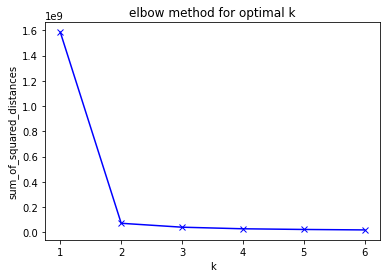

In [6]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X,x_cat))

In [7]:
# ALGORITHM FIT

kproto = KPrototypes(n_clusters=2, init='Cao').fit(X, categorical=x_cat)    # PRECISAR el N° clusters con "n_clusters", init no se cambia  ### Metodos de inicializacion: "Cao","Huang"

In [ ]:
# CLUSTER CENTROIDS

# print('Centroides optimos de clusteres')
# print(centroides(X,kproto))

In [8]:
# CLUSTER RESULTS

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kproto.labels_).head())

Asignacion de clusteres segun cada observacion
   CustomerID  Frequency  Monetary_value  ...  Recency  Country cluster
0       12347          7       44.048571  ...        2    Other       0
1       12348          1      201.360000  ...      358    Other       0
2       12349          1      178.570000  ...       18    Other       0
3       12350          1       25.200000  ...      310    Other       0
4       12352          5       37.130000  ...       80    Other       0

[5 rows x 7 columns]


In [9]:
# EXPORT RESULTS
#centroides(X,kproto).to_csv('centroides.csv') 
#files.download('centroides.csv')

clusteres(df,kproto.labels_).to_csv('resultadosKPrototypes.csv') 
files.download('resultadosKPrototypes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
